**NOTEBOOK 12**

## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>  

The goal of exercise 12 is to use deep neural network models (DNN), implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-09-27 18:55:33.387899: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 18:55:33.431979: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 18:55:33.432015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 18:55:33.433260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 18:55:33.440374: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 18:55:33.440904: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 9


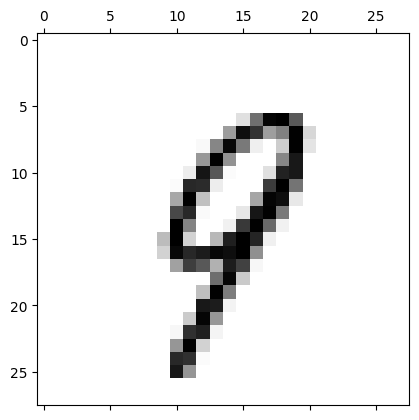

... and with label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[22])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[22,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[22], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

**Define the Neural Net and its Architecture**

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


**1-ADADELTA**

In [5]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(lr=1.0, rho=0.95,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


**Train the model**

In [6]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2024-09-27 18:55:37.255102: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 14s 7ms/step - loss: 2.2653 - acc: 0.1481 - val_loss: 2.1764 - val_acc: 0.2826
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 2.1486 - acc: 0.2229 - val_loss: 2.0542 - val_acc: 0.4319
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0353 - acc: 0.3016 - val_loss: 1.9268 - val_acc: 0.5336
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9282 - acc: 0.3661 - val_loss: 1.7960 - val_acc: 0.6247
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 1.8193 - acc: 0.4225 - val_loss: 1.6657 - val_acc: 0.6876
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7151 - acc: 0.4691 - val_loss: 1.5392 - val_acc: 0.7288
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6129 - acc: 0.5067 - val_loss: 1.4214 - val_acc: 0.7575
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/st

**Evaluate the Model Performance on the Unseen Test Data**

313/313 [==============================] - 1s 3ms/step - loss: 0.6449 - acc: 0.8798

Test loss: 0.6449007987976074
Test accuracy: 0.879800021648407


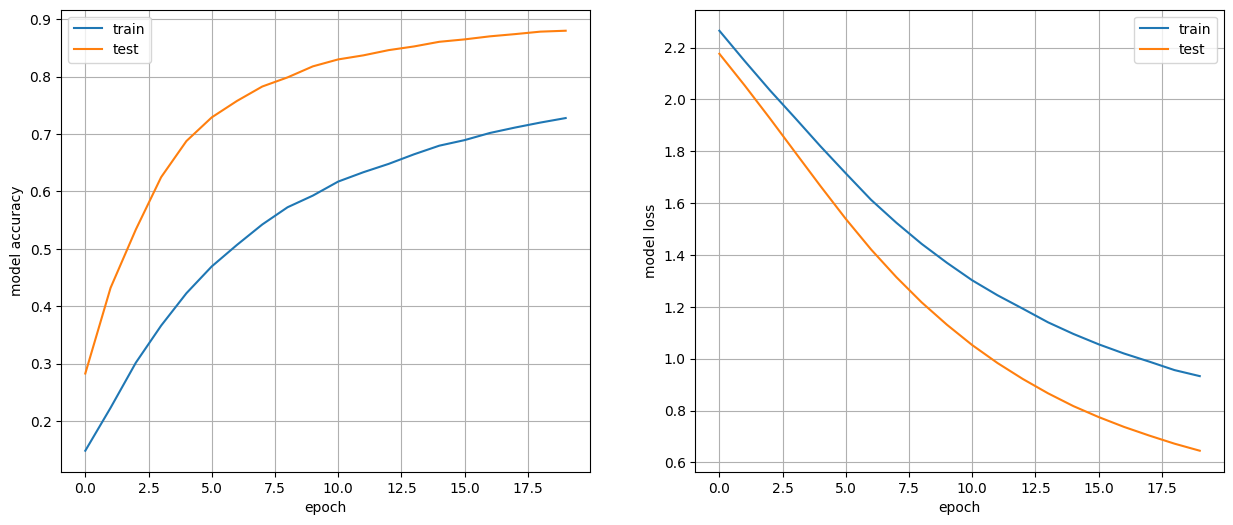

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


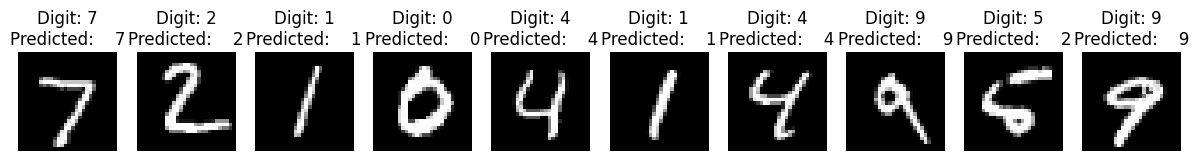

In [8]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**2-SGD**

In [9]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


**Train the model**

In [10]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2024-09-27 18:59:54.086347: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1870/1875 [============================>.] - ETA: 0s - loss: 0.8568 - acc: 0.7377

ValueError: in user code:

    File "/home/francesco/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/home/francesco/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/francesco/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/home/francesco/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/home/francesco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/francesco/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 1)


**Evaluate the Model Performance on the Unseen Test Data**

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**3-ADAM**

In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

**Train the model**

In [ ]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

**Evaluate the Model Performance on the Unseen Test Data**

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Comment

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

**Creating Convolutional Neural Nets with Keras**

In [ ]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

**Define the Neural Net and its Architecture**

In [ ]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(7, 7),
                     activation='relu',
                     input_shape=input_shape))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add a convolution layer with 20 filters
    model.add(Conv2D(20, kernel_size=(3, 3),
                     activation='relu',))
    # apply a pooliing with dimension 4x4
    model.add(MaxPooling2D(pool_size=(4, 4)))
    # apply a standard flat layer
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

print('Model architecture created successfully!')

**Train the model**

In [ ]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_CNN = create_CNN()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

**Evaluate the Model Performance on the Unseen Test Data**

In [ ]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

In [ ]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Comment

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

In [ ]:
from PIL import Image
import os

digit_filename = "./7_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

**Use the previous trained neural network**

In [ ]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

In [ ]:
digit_filename = "./5_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

In [ ]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

Comment